In [1]:
import os

import pandas as pd
import numpy as np

from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

In [2]:
ranks = {}
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [3]:
car = pd.read_csv("../datasets/cars/New_cars_preprocessed.csv")
car.head()

,Unnamed: 0,MSRP,EPA Fuel Economy Est - City (MPG),Engine,Drivetrain,Passenger Capacity,Passenger Doors,Wheelbase (in),SAE Net Torque @ RPM,Fuel System,...,Drivetrain Years,Turning Diameter - Curb to Curb (ft),Front Wheel Material,Roadside Assistance Miles/km,Manufacturer,Model year,Category,Front tire width,Front tire aspect ratio,Front tire rim size
0,0,40600.0,22.0,10,2,5,4,108.3,280.0,0,...,6.0,39.0,1,50000.0,0,2019,2,12,55.0,19.0
1,1,45500.0,22.0,10,2,5,4,108.3,280.0,0,...,6.0,39.0,1,50000.0,0,2019,2,12,55.0,19.0
2,2,43600.0,22.0,10,2,5,4,108.3,280.0,0,...,6.0,39.0,1,50000.0,0,2019,2,15,45.0,20.0
3,3,37400.0,22.0,10,2,5,4,108.3,280.0,0,...,6.0,39.0,1,50000.0,0,2019,2,12,55.0,19.0
4,4,42600.0,21.0,10,1,5,4,108.3,280.0,0,...,6.0,39.0,1,50000.0,0,2019,2,12,55.0,19.0


In [4]:
X_car = car.copy()
y_car = X_car.pop("MSRP")
colnames_car = X_car.columns
colnames = X_car.columns

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32262 entries, 0 to 32261
Data columns (total 36 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            32262 non-null  int64  
 1   MSRP                                  32262 non-null  float64
 2   EPA Fuel Economy Est - City (MPG)     32262 non-null  float64
 3   Engine                                32262 non-null  int64  
 4   Drivetrain                            32262 non-null  int64  
 5   Passenger Capacity                    32262 non-null  int64  
 6   Passenger Doors                       32262 non-null  int64  
 7   Wheelbase (in)                        32262 non-null  float64
 8   SAE Net Torque @ RPM                  32262 non-null  float64
 9   Fuel System                           32262 non-null  int64  
 10  SAE Net Horsepower @ RPM              32262 non-null  float64
 11  Displacement   

In [6]:
model = DecisionTreeRegressor()
model.fit(X_car, y_car)

DecisionTreeRegressor()

Feature: 0, Score: 0.01635
Feature: 1, Score: 0.00222
Feature: 2, Score: 0.00088
Feature: 3, Score: 0.00236
Feature: 4, Score: 0.00427
Feature: 5, Score: 0.00168
Feature: 6, Score: 0.02133
Feature: 7, Score: 0.02230
Feature: 8, Score: 0.00039
Feature: 9, Score: 0.55015
Feature: 10, Score: 0.03663
Feature: 11, Score: 0.00018
Feature: 12, Score: 0.00272
Feature: 13, Score: 0.00024
Feature: 14, Score: 0.00054
Feature: 15, Score: 0.00075
Feature: 16, Score: 0.00018
Feature: 17, Score: 0.00436
Feature: 18, Score: 0.00005
Feature: 19, Score: 0.00133
Feature: 20, Score: 0.26185
Feature: 21, Score: 0.00682
Feature: 22, Score: 0.00149
Feature: 23, Score: 0.00062
Feature: 24, Score: 0.00422
Feature: 25, Score: 0.00030
Feature: 26, Score: 0.00585
Feature: 27, Score: 0.00287
Feature: 28, Score: 0.00108
Feature: 29, Score: 0.02373
Feature: 30, Score: 0.00478
Feature: 31, Score: 0.00156
Feature: 32, Score: 0.00416
Feature: 33, Score: 0.00539
Feature: 34, Score: 0.00640


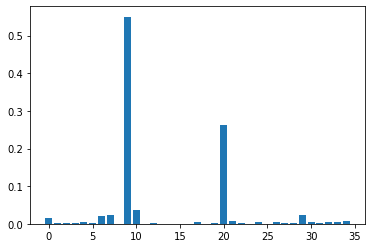

In [7]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [8]:
cart = DecisionTreeRegressor()
cart.fit(X_car,y_car)
ranks["CART"] = ranking(cart.feature_importances_, colnames);
ranks

{'CART': {'Unnamed: 0': 0.04,
  'EPA Fuel Economy Est - City (MPG)': 0.0,
  'Engine': 0.0,
  'Drivetrain': 0.0,
  'Passenger Capacity': 0.01,
  'Passenger Doors': 0.0,
  'Wheelbase (in)': 0.04,
  'SAE Net Torque @ RPM': 0.04,
  'Fuel System': 0.0,
  'SAE Net Horsepower @ RPM': 1.0,
  'Displacement': 0.07,
  'Trans Description Cont.': 0.0,
  'Trans Type': 0.0,
  'Air Bag-Side Head-Front': 0.0,
  'Air Bag-Side Head-Rear': 0.0,
  'Child Safety Rear Door Locks': 0.0,
  'Daytime Running Lights': 0.0,
  'Traction Control': 0.01,
  'Night Vision': 0.0,
  'Rollover Protection Bars': 0.0,
  'Basic Miles/km': 0.48,
  'Basic Years': 0.01,
  'Corrosion Miles/km': 0.0,
  'Corrosion Years': 0.0,
  'Drivetrain Miles/km': 0.01,
  'Drivetrain Years': 0.0,
  'Turning Diameter - Curb to Curb (ft)': 0.01,
  'Front Wheel Material': 0.01,
  'Roadside Assistance Miles/km': 0.0,
  'Manufacturer': 0.04,
  'Model year': 0.01,
  'Category': 0.0,
  'Front tire width': 0.01,
  'Front tire aspect ratio': 0.01,
  'F

In [9]:
decimalrank_df = pd.DataFrame()

# Join preranks in dataframe
for method_name, rank_list in ranks.items():
    df_Temp = pd.DataFrame(data = {method_name:pd.Series(rank_list)})
    decimalrank_df = pd.concat([decimalrank_df,df_Temp ], axis=1)

rank_df = pd.DataFrame()
# Create new integer ranks
for method_name, rank_list in ranks.items():
    rank_df[method_name] = decimalrank_df[method_name].rank(ascending=False)

rank_df['feature_name'] = rank_df.index
rank_df

,CART,feature_name
Unnamed: 0,5.5,Unnamed: 0
EPA Fuel Economy Est - City (MPG),26.5,EPA Fuel Economy Est - City (MPG)
Engine,26.5,Engine
Drivetrain,26.5,Drivetrain
Passenger Capacity,12.5,Passenger Capacity
Passenger Doors,26.5,Passenger Doors
Wheelbase (in),5.5,Wheelbase (in)
SAE Net Torque @ RPM,5.5,SAE Net Torque @ RPM
Fuel System,26.5,Fuel System
SAE Net Horsepower @ RPM,1.0,SAE Net Horsepower @ RPM


In [10]:
rank_df.to_csv('../data/cars_featureranks_CART.csv', sep=';',index=False)